In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving Sample Data for CXI.xlsx to Sample Data for CXI.xlsx


{'Sample Data for CXI.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00`\x92z\xbe\x83\x01\x00\x00\x0c\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
import xlrd
df = pd.read_excel('Sample Data for CXI.xlsx')

In [ ]:
df.head(5)

,Feedback Completion Date,Customer name,Level of Advocacy,And what are the most important reasons for giving us this score?,Staff RACF,Date,Day,Area
0,2.019110e+07,1,3,Helpful response but in ability to remove bran...,1,2019-11-01,Fri,1
1,2.019110e+07,2,4,Brandon listened and took ownership of my comp...,2,2019-11-01,Fri,1
2,2.019110e+07,3,1,Tah last gif was great but the one before him ...,3,2019-11-01,Fri,2
3,2.019110e+07,4,4,"I felt very reassured at the end of my call , ...",4,2019-11-01,Fri,1
4,2.019110e+07,5,4,very helpful,5,2019-11-01,Fri,3


In [ ]:
df.rename(columns = {'And what are the most important reasons for giving us this score?':'document_text', 'Customer name':'document_id' }, inplace = True)

In [ ]:
df.head(1)

,Feedback Completion Date,document_id,Level of Advocacy,document_text,Staff RACF,Date,Day,Area
0,2.019110e+07,1,3,Helpful response but in ability to remove bran...,1,2019-11-01,Fri,1


In [ ]:
df = df[["document_text","document_id"]]
df.head(2)

,document_text,document_id
0,Helpful response but in ability to remove bran...,1
1,Brandon listened and took ownership of my comp...,2


In [ ]:
import spacy
from spacy import displacy
 
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'The lady was very polite. The previous customer service advisor I had spoken to was extremely rude.')
print('DEPENDENCY RELATIONS')
displacy.render(doc, style='dep',jupyter=True)

DEPENDENCY RELATIONS


In [ ]:
import spacy
from spacy import displacy
 
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'So nice to have uk based call centre & a a friendly voice')
print('DEPENDENCY RELATIONS')
displacy.render(doc, style='dep',jupyter=True)
for token in doc:
  child=[token for token in token.children]
  print(token,token.dep_,child)

DEPENDENCY RELATIONS


So advmod []
nice ROOT [So, have]
to aux []
have xcomp [to, uk, centre]
uk dobj []
based amod []
call compound [based]
centre dobj [call, &, voice]
& cc []
a det []
a det []
friendly amod []
voice conj [a, a, friendly]


In [ ]:
import spacy
from spacy import displacy
 
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'Brandon listened and took ownership of my complaint and resolved it. Thanks')
print('DEPENDENCY RELATIONS')
displacy.render(doc, style='dep',jupyter=True)
for token in doc:
  child=[token for token in token.children]
  print(token,token.dep_,child)

DEPENDENCY RELATIONS


Brandon nsubj []
listened ROOT [Brandon, and, took, .]
and cc []
took conj [ownership, and, resolved]
ownership dobj [of]
of prep [complaint]
my poss []
complaint pobj [my]
and cc []
resolved conj [it]
it dobj []
. punct []
Thanks ROOT []


In [ ]:
import spacy
from spacy import displacy
 
nlp = spacy.load("en_core_web_sm")
doc = nlp(u'The lady was very polite. The previous customer service advisor I had spoken to was extremely rude.')
print('DEPENDENCY RELATIONS')
displacy.render(doc, style='dep',jupyter=True)
for token in doc:
  child=[token for token in token.children]
  print(token,token.dep_,child)

DEPENDENCY RELATIONS


The det []
lady nsubj [The]
was ROOT [lady, polite, .]
very advmod []
polite acomp [very]
. punct []
The det []
previous amod []
customer compound []
service compound [customer]
advisor nsubj [The, previous, service, spoken]
I nsubj []
had aux []
spoken relcl [I, had]
to aux []
was ROOT [advisor, to, rude, .]
extremely advmod []
rude acomp [extremely]
. punct []


In [ ]:
def get_entities_from_text(input_dataset):
    # Function to extract entities from data using Spacy's POS tagging and dependency parser
    import spacy
    
    # load spacy
    nlp = spacy.load("en_core_web_sm")
    out_col = []
    tagged_sent = []
    
    # Iteratively, for every row in the data, extract entities based on custom rules, and create tagged sentence with entities marked as <entity>
    for text in input_dataset.iloc[:,0]:
        doc = nlp(str(text))  # apply spacy's parser on text
        ent = set()
        j=0
        custom_sent = []
        
        # Iterate through every token as identified by spacy to find entities
        for i,X in enumerate(doc):
            if j>i: # If next word is already processed as an entity, skip this iteration
                continue
            else:
                j = i
            # Get the text, pos tag and dependency tag from token
            x = X.text.strip()
            pos = X.pos_
            dep = X.dep_
            if j != len(doc)-1: # If we are working with the last token, do not try to extract the next token, else try extracting the next token after that
                nxt = doc[j+1].text.strip()
            
            # If pos tag is noun or proper-noun and dependency tag is not compound, and the token is not a single character, consider that as an entity. Add token to tagged sentence list as <token>
            if pos in ['PROPN','NOUN'] and dep not in ['compound'] and len(x)>1:
                ent.add(x)
                custom_sent.append(f"<{x}>")
                j = j+1
            # If pos tag is pronoun and it is not "I" or "me", consider that as an entity. Add token to tagged sentence list as <token>
            elif pos in ['PRON'] and x.lower() not in ['i','me']:
                ent.add(x)
                custom_sent.append(f"<{x}>")
                j = j+1
            # If pos tag is noun or pronoun and dependency is not compound, then consider the current word and the next word as an entity. Add current and next token to tagged sentence list as <curr_token next_token>
            elif pos in ['PROPN','NOUN'] and dep in ['compound']:
                ent.add(" ".join([x,nxt]))
                custom_sent.append(f"<{x} {nxt}>")
                j = j+2
            else:
                j = j+1
                custom_sent.append(f"{x}")
                
        # Create tagged sentence by joining together all individual words
        tagged_sent.append(" ".join(custom_sent))
        out_col.append(list(ent)) # append entities list to output column
    return pd.DataFrame({
        "document_text": input_dataset.iloc[:,0],
        "document_id": input_dataset.iloc[:,1],
        "model_entities_updated": out_col,
        "tagged_sent": tagged_sent
    })

In [ ]:
df = get_entities_from_text(df)
df.head()

,document_text,document_id,model_entities_updated,tagged_sent
0,Helpful response but in ability to remove bran...,1,"[response, days, card, ability, branch marker]",Helpful <response> but in <ability> to remove ...
1,Brandon listened and took ownership of my comp...,2,"[ownership, Brandon, Thanks, it, complaint]",<Brandon> listened and took <ownership> of my ...
2,Tah last gif was great but the one before him ...,3,"[tel, God, card reader, It, account, gif, year...",<Tah> last <gif> was great but the <one> befor...
3,"I felt very reassured at the end of my call , ...",4,"[stage, Customer Sservice, problem, cash, Advi...",I felt very reassured at the <end> of my <call...
4,very helpful,5,[],very helpful


In [ ]:
def get_entity_dependencies(input_dataset):
    """Function to extract dependent children for every entity, using spacy's dependency parser"""
    from collections import defaultdict
    import spacy

    nlp = spacy.load("en_core_web_sm")
    #data_col = parameters.get("data_column", "document_text")
    #tagged_col = parameters.get("tagged_column", "tagged_sent")
    
    data = input_dataset["document_text"]
    tagged = input_dataset["tagged_sent"]
    
    all_children = []
     # Iterate through original and tagged columns together to identify entities from the tagged column and dependency from original text column
    for text, tagged_text in zip(data, tagged):
        doc = nlp(str(text))
        children = defaultdict(list)
        prev_tok = ""
        for tok in doc:
            is_useful = False
            
            # If current token, or current and previous token together form an entity, mark it as useful
            if (f"<{tok}>" in tagged_text):
                ent = tok
                is_useful = True
            elif (f"<{prev_tok} {tok}>" in tagged_text):
                ent = f"{prev_tok} {tok}"
                is_useful = True
            
            # If token is useful, extract it's children using direct children as per the dependency tagging as well as the children extracted from children's subtree. It forms a grandparent relation
            if is_useful:
                children[f'{ent}'].extend([f'{child}' for child in tok.subtree])
            prev_tok = tok
            
         # Append list of children to all children and return as dataframe
        all_children.append(dict(children))       
    return pd.DataFrame({
        "document_text": input_dataset.iloc[:,0],
        "document_id": input_dataset.iloc[:,1],
        "model_entities_updated": input_dataset.iloc[:,2],
        "tagged_sent": input_dataset.iloc[:,3],
        "entity_dependencies": all_children
    })

In [ ]:
df = get_entity_dependencies(df)
df.head(2)

,document_text,document_id,model_entities_updated,tagged_sent,entity_dependencies
0,Helpful response but in ability to remove bran...,1,"[response, days, card, ability, branch marker]",Helpful <response> but in <ability> to remove ...,"{'response': ['Helpful', 'response', 'but'], '..."
1,Brandon listened and took ownership of my comp...,2,"[ownership, Brandon, Thanks, it, complaint]",<Brandon> listened and took <ownership> of my ...,"{'Brandon': ['Brandon'], 'ownership': ['owners..."


In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [ ]:
def sentiment_scoring_vader(input_dataset):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    sent_analyzer = SentimentIntensityAnalyzer()
    import spacy
    nlp = spacy.load("en_core_web_sm")
    out_col1=[]
    out_col2=[]
    # data_col = parameters.get("data_column", "document_text")
    # ents_dep = parameters.get("tagged_column", "get_entity_dependencies_doc_text_tagged_sent")
    data = input_dataset["document_text"]
    dep = input_dataset["entity_dependencies"]
    
    # Iterate through the original text and the entitites dependency data
    for text, orig_sent in zip(dep,data):
        doc = nlp(str(orig_sent))
        sentiments = dict()
        com_sentiment=dict()
        for i in text:
            a,b = i,text[i]
            
            # joined all the dependent words of an entity and created a string with all the dependent words
            res= " ".join(str(item) for item in b)
            
            # Apply the VADER sentiment analyser on the resultant string to calculate the sentiment scores for each entity
            sent_pol = sent_analyzer.polarity_scores(res)
            sentiments.update({a:sent_pol})
            com_sentiment.update({a:sent_pol['compound']})
        # Calculate the sentiment score of the whole document    
        sent_score = sent_analyzer.polarity_scores(doc.text)
        sentiments.update({"Overall_Feedback_Sentiment": sent_score})
        com_sentiment.update({"Overall_Feedback_Sentiment": sent_score['compound']})
        
        out_col1.append(sentiments)
        out_col2.append(com_sentiment)
    return pd.DataFrame({
        "document_text": input_dataset.iloc[:,0],
        "document_id": input_dataset.iloc[:,1],
        "model_entities_updated": input_dataset.iloc[:,2],
        "tagged_sent": input_dataset.iloc[:,3],
        "entity_dependencies": input_dataset.iloc[:,4],
        "Sentiment_score_vader": out_col1,
        "compound_sentiment_score": out_col2
        })

In [ ]:
df = sentiment_scoring_vader(df)
df.head(2)

,document_text,document_id,model_entities_updated,tagged_sent,entity_dependencies,Sentiment_score_vader,compound_sentiment_score
0,Helpful response but in ability to remove bran...,1,"[response, days, card, ability, branch marker]",Helpful <response> but in <ability> to remove ...,"{'response': ['Helpful', 'response', 'but'], '...","{'response': {'neg': 0.0, 'neu': 0.513, 'pos':...","{'response': 0.2263, 'ability': 0.3182, 'branc..."
1,Brandon listened and took ownership of my comp...,2,"[ownership, Brandon, Thanks, it, complaint]",<Brandon> listened and took <ownership> of my ...,"{'Brandon': ['Brandon'], 'ownership': ['owners...","{'Brandon': {'neg': 0.0, 'neu': 1.0, 'pos': 0....","{'Brandon': 0.0, 'ownership': -0.296, 'complai..."


In [ ]:
def create_final_table_for_extract(df):
    import pandas as pd
    from collections import defaultdict
    
    # Function to get sentiment - Positive, Negative, Neutral from the sentiment score
    def get_sentiment_from_score(sentiment_score):
        if sentiment_score<-0.2:
            return "Negative"
        elif sentiment_score>0.3:
            return "Positive"
        else:
            return "Neutral"
    
    # Intialize empty default dictionary to hold lists
    out_df = defaultdict(list)
    
    # Iterate over rows of the data to extract individual entities from the row and place them in separate rows
    for i,row in df[["document_id","document_text", "model_entities_updated", "compound_sentiment_score"]].iterrows():
        doc_id, doc_text, model_ents, sentiments = row
        row_data = sentiments
        # sentiments_dict = ast.literal_eval(str(sentiments))
        # entities_list = ast.literal_eval(str(model_ents))
        
        # Get overall sentiment score and the sentiment
        overall_sentiment_score = sentiments["Overall_Feedback_Sentiment"]
        overall_sentiment = get_sentiment_from_score(overall_sentiment_score)
        
        # Create a new entry in every element of output dictionary for entities in the row
        for entity in model_ents:
            out_df["doc_id"].append(doc_id)
            out_df["text"].append(doc_text)
            out_df["sentiment_score"].append(overall_sentiment_score)
            out_df["sentiment"].append(overall_sentiment)
            out_df["entity"].append(entity)
            sent_score = sentiments.get(entity, 0)
            out_df["entity_sentiment_score"].append(sent_score)
            out_df["entity_sentiment"].append(get_sentiment_from_score(sent_score))
    return pd.DataFrame(out_df)

In [ ]:
out_df = create_final_table_for_extract(df)
out_df.head()

,doc_id,text,sentiment_score,sentiment,entity,entity_sentiment_score,entity_sentiment
0,1,Helpful response but in ability to remove bran...,0.5927,Positive,response,0.2263,Neutral
1,1,Helpful response but in ability to remove bran...,0.5927,Positive,days,0.0000,Neutral
2,1,Helpful response but in ability to remove bran...,0.5927,Positive,card,0.0000,Neutral
3,1,Helpful response but in ability to remove bran...,0.5927,Positive,ability,0.3182,Positive
4,1,Helpful response but in ability to remove bran...,0.5927,Positive,branch marker,0.0000,Neutral


In [ ]:
out_df.to_csv('EBSA_output.csv') 
files.download('EBSA_output.csv')

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving Preprocessed_Data_Topic_Modelling.xlsx to Preprocessed_Data_Topic_Modelling.xlsx


{'Preprocessed_Data_Topic_Modelling.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dha\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
import xlrd
df_top = pd.read_excel('Preprocessed_Data_Topic_Modelling.xlsx')

In [ ]:
df_top.head(2)

,processed_text,document_id
0,helpful response ability remove branch marker ...,1
1,brandon listen take ownership complaint resolv...,2


In [ ]:
def phrase_model_creation(input_dataset):
    from gensim.models.phrases import Phrases, Phraser
    # start_idx, end_idx = 0, -1
    thresh = 10
    min_count = 100
    # data_column = parameters.get("data_col", "processed_data")
    vocab_data = [str(doc).split(' ') for doc in input_dataset["processed_text"]]
    phrase_model = Phrases(vocab_data, min_count=min_count, threshold=thresh)
    # Save the model object to the following file
    data_object_file_name   = "phrase_model.sav"
    phrase_model.save(data_object_file_name)
    summary = phrase_model.vocab
    summary_df = pd.DataFrame({
        "phrase": [k.decode("utf-8") for k in summary.keys()],
        "count": list(summary.values())
    })
    summary_df_sorted = pd.DataFrame(summary_df.sort_values(by=['count'], ascending=False))
    return summary_df_sorted

In [ ]:
x = phrase_model_creation(df_top)
x.head()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,phrase,count
15,,3162
0,helpful,624
81,_,318
345,friendly,254
274,service,224


In [ ]:
def phrase_model_application(input_dataset):
    from gensim.models.phrases import Phrases, Phraser
    # data_col = parameters.get("data_col", "processed_data")
    vocab_data = [str(doc).split(' ') for doc in input_dataset["processed_text"]]
    phrase_model_file = "phrase_model.sav"
    phrase_model = Phrases.load(phrase_model_file)
    # Apply the Phrase model on the Pre-processed text to get the Bigram model results and then applied the model on the Bigram model data to obtain the Trigram model results
    ngram = Phraser(phrase_model)
    phrased_data = ngram[vocab_data]
    ngram_output_data = []
    for sent in phrased_data:
        ngram_output_data.append(' '.join(s for s in sent))
    return pd.DataFrame({
        "processed_text": input_dataset.iloc[:,0],
        "document_id": input_dataset.iloc[:,1],
        "ngram_result": ngram_output_data
    })

In [ ]:
df_top = phrase_model_application(df_top)
df_top.head(25)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,processed_text,document_id,ngram_result
0,helpful response ability remove branch marker ...,1,helpful response ability remove branch marker ...
1,brandon listen take ownership complaint resolv...,2,brandon listen take ownership complaint resolv...
2,tah gif great awful cause lot stress basicall...,3,tah gif great awful cause lot stress basically...
3,feel reassured end problem solve shall lose c...,4,feel reassured end problem solve shall lose ca...
4,helpful,5,helpful
5,helpful reassure peace mind,6,helpful reassure peace mind
6,english language weak emploee not help example...,7,english language weak emploee not help example...
7,able complete need polite clear,8,able complete need polite clear
8,lady polite previous customer service advisor...,9,lady polite previous customer service advisor ...
9,slightly deaf easily fluster bank stuff ...,10,slightly deaf easily fluster bank stuff time r...


In [ ]:
# For tri gram extraction
def tri_phrase_model_creation(input_dataset):
    from gensim.models.phrases import Phrases, Phraser
    # start_idx, end_idx = 0, -1
    thresh = 10
    min_count = 100
    # data_column = parameters.get("data_col", "processed_data")
    vocab_data = [str(doc).split(' ') for doc in input_dataset["ngram_result"]]
    phrase_model = Phrases(vocab_data, min_count=min_count, threshold=thresh)
    # Save the model object to the following file
    data_object_file_name   = "phrase_model2.sav"
    phrase_model.save(data_object_file_name)
    summary = phrase_model.vocab
    summary_df = pd.DataFrame({
        "phrase": [k.decode("utf-8") for k in summary.keys()],
        "count": list(summary.values())
    })
    summary_df_sorted = pd.DataFrame(summary_df.sort_values(by=['count'], ascending=False))
    return summary_df_sorted

In [ ]:
Y = tri_phrase_model_creation(df_top)
Y.head()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,phrase,count
0,helpful,624
306,friendly,254
234,polite,224
243,service,224
271,\n,207


In [ ]:
# Phrase model for tri gram
def tri_phrase_model_application(input_dataset):
    from gensim.models.phrases import Phrases, Phraser
    # data_col = parameters.get("data_col", "processed_data")
    vocab_data = [str(doc).split(' ') for doc in input_dataset["ngram_result"]]
    phrase_model_file = "phrase_model2.sav"
    phrase_model = Phrases.load(phrase_model_file)
    # Apply the Phrase model on the Pre-processed text to get the Bigram model results and then applied the model on the Bigram model data to obtain the Trigram model results
    ngram = Phraser(phrase_model)
    phrased_data = ngram[vocab_data]
    ngram_output_data = []
    for sent in phrased_data:
        ngram_output_data.append(' '.join(s for s in sent))
    return pd.DataFrame({
        "processed_text": input_dataset.iloc[:,0],
        "document_id": input_dataset.iloc[:,1],
        "bi_gram_result": input_dataset.iloc[:,2],
        "tri_gram_result": ngram_output_data
    })

In [ ]:
df_top = tri_phrase_model_application(df_top)
df_top.head()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,processed_text,document_id,bi_gram_result,tri_gram_result
0,helpful response ability remove branch marker ...,1,helpful response ability remove branch marker ...,helpful response ability remove branch marker ...
1,brandon listen take ownership complaint resolv...,2,brandon listen take ownership complaint resolv...,brandon listen take ownership complaint resolv...
2,tah gif great awful cause lot stress basicall...,3,tah gif great awful cause lot stress basically...,tah gif great awful cause lot stress basically...
3,feel reassured end problem solve shall lose c...,4,feel reassured end problem solve shall lose ca...,feel reassured end problem solve shall lose ca...
4,helpful,5,helpful,helpful


In [ ]:
def optimal_topics(input_dataset):
    import numpy as np
    import spacy
    from gensim import corpora
    from gensim.models import LdaModel, LdaMulticore
    import matplotlib.pyplot as plt
    from gensim.models.coherencemodel import CoherenceModel
    nlp = spacy.load("en_core_web_sm")
    out_col=[]
    for text in input_dataset.iloc[:,2]:
        doc = nlp(str(text))
        X=[]
        for token in doc:
            tokens = token.text
            if len(tokens)>4:
                tok = tokens
                X.append(tok)
        out_col.append(X)  
    dictionary = corpora.Dictionary(out_col)
    corpus = [dictionary.doc2bow(text) for text in out_col] 
    models_list = []
    for topics in range(3,30):
        lda_model = LdaMulticore(corpus=corpus,
                                 id2word=dictionary,
                                 random_state=100,
                                 num_topics= topics,
                                 passes=10,
                                 chunksize=1000,
                                 batch=False,
                                 alpha='asymmetric',
                                 decay=0.5,
                                 offset=64,
                                 eta=None,
                                 eval_every=0,
                                 iterations=100,
                                 gamma_threshold=0.001,
                                 per_word_topics=True)
        models_list.append(lda_model)
    topics = list(range(3,30))
    coherence_score = []
    for top,model in zip(topics,models_list):
        coherence_model_lda = CoherenceModel(model=model, texts=out_col, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_score.append(coherence_lda)
    
    coherence_score_sorted = sorted(coherence_score)
    print(coherence_score_sorted)
    print(coherence_score)
    max_coherence_score_idx = coherence_score.index(max(coherence_score))
    second_max_coh_score_idx = coherence_score.index(coherence_score_sorted[-2])
    
    print(max_coherence_score_idx)
    print(second_max_coh_score_idx)
    
    plt.plot(topics, coherence_score)
    plt.xticks(np.arange(min(topics), max(topics)+2, 2.0))
    plt.vlines(x=max_coherence_score_idx+3, ymin=0, ymax=max(coherence_score),linestyles='dashed')
    plt.vlines(x=second_max_coh_score_idx+3, ymin=0, ymax=coherence_score_sorted[-2],linestyles='dashed')
    plt.title('Optimal Number of Topics')
    plt.xlabel('Topic')
    plt.ylabel('Coherence Score')
    # plt.savefig(var["outputFileDirectory"]+"optimal_topics.png")

[0.32671511538433395, 0.33798673936990475, 0.3412551906990223, 0.3604225780353124, 0.3610290660887109, 0.37195442860564265, 0.37382886514547387, 0.38008072784239205, 0.3869223586049849, 0.40572618901027435, 0.4064562907694525, 0.40932889814150847, 0.415553890704963, 0.4162891382692094, 0.4164609184159411, 0.42354495131285796, 0.426621805130116, 0.42666788860745053, 0.4322510315860117, 0.45053191877303256, 0.4529466129749217, 0.46092239352128855, 0.4712573261161505, 0.4889930985145135, 0.5000789971566186, 0.5085730471957804, 0.5220341363438814]
[0.32671511538433395, 0.3610290660887109, 0.3869223586049849, 0.40932889814150847, 0.3412551906990223, 0.37195442860564265, 0.3604225780353124, 0.33798673936990475, 0.415553890704963, 0.4712573261161505, 0.4164609184159411, 0.38008072784239205, 0.4162891382692094, 0.37382886514547387, 0.426621805130116, 0.4322510315860117, 0.4529466129749217, 0.5085730471957804, 0.42354495131285796, 0.40572618901027435, 0.42666788860745053, 0.45053191877303256, 0

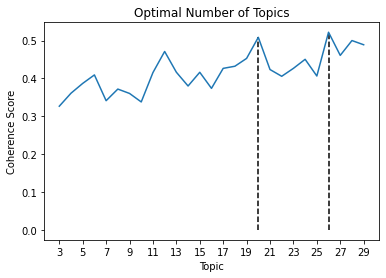

In [ ]:
optimal_topics(df_top)

In [ ]:
def lda_model(input_dataset, topics):
    import joblib
    import spacy
    from gensim import corpora
    from gensim.models import LdaModel, LdaMulticore
    nlp = spacy.load("en_core_web_sm")
    out_col=[]
    for text in input_dataset.iloc[:,3]:
        doc = nlp(str(text))
        X=[]
        for token in doc:
            tokens = token.text
            if len(tokens)>4:
                tok = tokens
                X.append(tok)
        out_col.append(X)
    dictionary = corpora.Dictionary(out_col)
    corpus = [dictionary.doc2bow(text) for text in out_col] 
    lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         random_state=100,
                         num_topics= topics,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)
    
    
    # Save the model object to the following file
    data_object_file_name   = "topic_model.sav"
    joblib.dump(lda_model, data_object_file_name)
    
    X = lda_model.show_topics(formatted=False)
    df = pd.DataFrame(X,columns=["Topic_No","Weight_of_Top10_contributors"])
    return df

In [ ]:
topic_df = lda_model(df_top, 5)
topic_df.head()

,Topic_No,Weight_of_Top10_contributors
0,0,"[(helpful, 0.07744757), (friendly, 0.031216476..."
1,1,"[(speak, 0.023234194), (debit, 0.01522738), (a..."
2,2,"[(service, 0.014200424), (banking, 0.011470683..."
3,3,"[(payment, 0.017732367), (phone, 0.016344186),..."
4,4,"[(number, 0.0114904465), (allow, 0.007311448),..."


In [ ]:
def apply_lda_model(input_dataset):
    import joblib
    import spacy
    from gensim import corpora
    from gensim.models import LdaModel, LdaMulticore
    nlp = spacy.load("en_core_web_sm")
    out_col=[]
    # Iterate through the Trigram model data that we got through Phrase modelling
    for text in input_dataset.iloc[:,3]:
        doc = nlp(str(text))
        X=[]
        for token in doc:
            tokens = token.text
            if len(tokens)>4: # For dictionary building and Topic modelling, considered only those tokens from text whose length is greater than 4.
                tok = tokens
                X.append(tok)
        out_col.append(X)
    # Build the Dictionary and Corpus from the list of tokens extracted from the text.   
    dictionary = corpora.Dictionary(out_col)
    corpus = [dictionary.doc2bow(text) for text in out_col]
    # Load the Lda Model object
    lda_model_file = "topic_model.sav"
    lda_model = joblib.load(lda_model_file)
    ## Creating a final data with dominant topic, Top keywords of Topic and Topic percent contribution
    def format_topics_sentences(ldamodel=None, corpus=corpus, texts=out_col):
        sent_topics_df = pd.DataFrame()
        for i, row_list in enumerate(ldamodel[corpus]):
            row = row_list[0] if ldamodel.per_word_topics else row_list
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        sent_topics_df.columns = ["Dominant_Topic","Topic_Perc_Contrib","Keywords","Text"]
        return sent_topics_df
    df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=out_col)
    return df_dominant_topic

In [ ]:
df1 = apply_lda_model(df_top)
df1.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9016,"helpful, friendly, polite, service, problem, a...","[helpful, response, ability, remove, branch, m..."
1,0.0,0.9041,"helpful, friendly, polite, service, problem, a...","[brandon, listen, ownership, complaint, resolv..."
2,0.0,0.9821,"helpful, friendly, polite, service, problem, a...","[great, awful, cause, stress, basically, accou..."
3,0.0,0.9580,"helpful, friendly, polite, service, problem, a...","[reassured, problem, solve, shall, anticipate,..."
4,0.0,0.6662,"helpful, friendly, polite, service, problem, a...",[helpful]


In [ ]:
df2 = pd.concat([df_top, df1], axis = 1)
df2.head()

,processed_text,document_id,bi_gram_result,tri_gram_result,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,helpful response ability remove branch marker ...,1,helpful response ability remove branch marker ...,helpful response ability remove branch marker ...,0.0,0.9016,"helpful, friendly, polite, service, problem, a...","[helpful, response, ability, remove, branch, m..."
1,brandon listen take ownership complaint resolv...,2,brandon listen take ownership complaint resolv...,brandon listen take ownership complaint resolv...,0.0,0.9041,"helpful, friendly, polite, service, problem, a...","[brandon, listen, ownership, complaint, resolv..."
2,tah gif great awful cause lot stress basicall...,3,tah gif great awful cause lot stress basically...,tah gif great awful cause lot stress basically...,0.0,0.9821,"helpful, friendly, polite, service, problem, a...","[great, awful, cause, stress, basically, accou..."
3,feel reassured end problem solve shall lose c...,4,feel reassured end problem solve shall lose ca...,feel reassured end problem solve shall lose ca...,0.0,0.9580,"helpful, friendly, polite, service, problem, a...","[reassured, problem, solve, shall, anticipate,..."
4,helpful,5,helpful,helpful,0.0,0.6662,"helpful, friendly, polite, service, problem, a...",[helpful]


In [ ]:
df2.to_csv('5_new_topic_modeling.csv') 
files.download('5_new_topic_modeling.csv')

In [ ]:
def create_final_table_for_extract(df, parameters, var):
    import pandas as pd
    from collections import defaultdict
    
    # Function to get sentiment - Positive, Negative, Neutral from the sentiment score
    def get_sentiment_from_score(sentiment_score):
        if sentiment_score<0:
            return "Negative"
        elif sentiment_score>0:
            return "Positive"
        else:
            return "Neutral"
    
    # Intialize empty default dictionary to hold lists
    out_df = defaultdict(list)
    
    # Iterate over rows of the data to extract individual entities from the row and place them in separate rows
    for i,row in df[["doc_id", "doc_text", "model_entities_updated", "compound_sentiment_score", "Dominant_Topic", "Topic_Perc_Contrib", "Parent_Topic", "Sub_topic1", "Sub_topic2"]].iterrows():
        doc_id, doc_text, model_ents, sentiments, topic, topic_contrib, topic_name, subtopic1, subtopic2 = row
        row_data = sentiments
        sentiments_dict = ast.literal_eval(str(sentiments))
        entities_list = ast.literal_eval(str(model_ents))
        
        # Get overall sentiment score and the sentiment
        overall_sentiment_score = sentiments_dict["Overall_Feedback_Sentiment"]
        overall_sentiment = get_sentiment_from_score(overall_sentiment_score)
        
        # Create a new entry in every element of output dictionary for entities in the row
        for entity in entities_list:
            out_df["doc_id"].append(doc_id)
            out_df["text"].append(doc_text)
            out_df["sentiment_score"].append(overall_sentiment_score)
            out_df["sentiment"].append(overall_sentiment)
            out_df["topic"].append(topic)
            out_df["topic_name"].append(topic_name)
            out_df["topic_contribution"].append(topic_contrib)
            out_df["sub_topic1"].append(subtopic1)
            out_df["sub_topic2"].append(subtopic2)
            out_df["entity"].append(entity)
            sent_score = sentiments_dict.get(entity, 0)
            out_df["entity_sentiment_score"].append(sent_score)
            out_df["entity_sentiment"].append(get_sentiment_from_score(sent_score))
    return pd.DataFrame(out_df)